# CIS 9
# Unsupervised Learning: k-Means Clustering 

Reading

Python Data Handbook Chapter 5: k-Means Clustering
- Introducing k-Means
- k-Means Algorithm: Expectation–Maximization

### Clustering

In unsupervised learning, there are input features but no output labels to "learn" from. In other words, there are no output labels that act as a supervisor to tell us how accurate the predicted output is.  Instead, the goal of unsupervised learning is to find hidden patterns in the unlabeled data. Unsupervised learning is learning by observation, rather than learning by examples as in supervised learning.

A common way to find hidden patterns in unlabeled data is to group the data into clusters based on the similarities in the data. A cluster is a grouping of data that are similar to each other in some way, and are dissimilar to data belonging to other clusters.

There are multiple ways to cluster data, k-means is one of the most straight forward ways. K-means is a _partition based clustering_, which means data are partitioned into k mutually exclusive clusters, where k is a user defined value. Other types of clustering are _hierarchical clustering_ (grouping data with similarity together until there are a certain number of clusters), and _density based clustering_ (plot data and group the ones that are closer together into one cluster).

### k-Means Clustering

The k-means algorithm is an iterative algorithm. It starts by randomly creating k _centroids_ or centers of a cluster. Then it puts each data point into a cluster based on how close the data value is to a particular centroid. When all data are in clusters, the algorithm calculates the mean of each cluster, and the mean serves as a new centroid for a new cluster. The algorithm keeps repeating the 2 steps of putting all data into the new clusters and calculates the new centroids, and this iterative process ends when all the newly calculated centroids are the same value as the previous centroid.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

We start with data of customers at a mall. The data has customers' ID, genre, age, income, and spending score.  The spending score is important to theh mall because it shows how often the customers shops / spends money at the mall. We want to see if there's customer attribute that's associated with a higher spending score.
The input data is _mall.csv_ ([source](https://www.kaggle.com/shwetabh123/mall-customers)).

In [2]:
# 1. Read in data from mall.csv. Show the size of the data and the first lines of data.
df = pd.read_csv("mall.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# 2. Find basic statistics on the data (mean, standard devision, min, max, quartile of each feature or column)
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Since we're interested in the general attribute of customers, create a new DataFrame called testdata that's easier to work with. 

In [5]:
# 3. a. remove the CustomerID field
#    b. simplify the column labels to genre, age, income, and spend
#    c. print the first few lines of the data to show the change
df.drop("CustomerID", axis=1, inplace=True)
df.columns = ["genre", "age", "income", "spend"]
print(df.head())

    genre  age  income  spend
0    Male   19      15     39
1    Male   21      15     81
2  Female   20      16      6
3  Female   23      16     77
4  Female   31      17     40


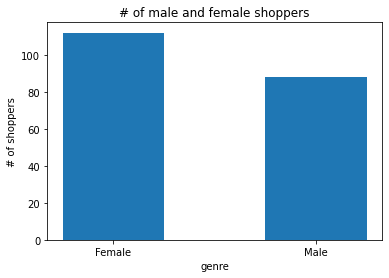

In [9]:
# 4. To get some preliminary idea of the customer attributes, first let's see the ratio of male / female shoppers
# Show a bar chart of the number of male and female shoppers.
counts = df["genre"].value_counts()
plt.bar(counts.index.values, counts.values, width=0.5)
plt.xlabel("genre")
plt.ylabel("# of shoppers")
plt.title("# of male and female shoppers")
plt.show()

array([[<AxesSubplot:title={'center':'spend'}>]], dtype=object)

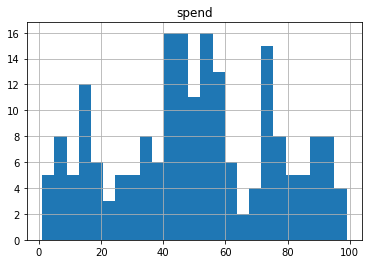

In [14]:
# 5. Next, let's view the distribution of the age, income, and spending score
# Are the shoppers generally younger or oder? Low, mid, or high income? 
# Is the spending score a normal or Gaussian distribution?
# What's significant about the spending score being a Gaussian distribution?

## The shoppers are generally older and have a mid income
## The spending score is not a normal or Gaussian distribution and instead seems to have three peaks
df.hist(column="spend", bins=25)

First we see if the income has any effect on the spending score

In [ ]:
# 6. 
X = testdata.drop(columns=['genre','age'])
print(X.columns.values)

To use the k-means model, we need to determine the k value that will work best with the dataset (this is similar to the knn model for supervised learning). There is no rule of thumb for determining k, but there's an _elbow method_ that works well in practice.

The basic idea of k-means clustering is to define clusters such that the distance between each data point in the cluster and the centroid is as small as possible, because it means the data in the cluster are as tight together as possible. The measurement of this distance is called the within-cluster sum of square (WCSS). 

To find the optimal k value, we try different k values with the k-means algorithm and plot the WCSS of each k value. As the k value increases, the WCSS value will drop as the cluster gets tighter, until the k value gets too large and we don't see the benefit of having more clusters. The plot typically has a bend (like a bent elbow), and that's the location of the optimal k value.

In [ ]:
# 7. Calculate the optimal k value
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')   # k-means++ is a good general purpose seed value for randomly selecting the initial centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.title("Elbow plot")
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [ ]:
# 8. From the above plot, we use k = 5 to create the model, train and test the model
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
# we see that there are 5 clusters in the k-means output, with values from 0 to 4

Using the k-means output, we plot the income vs. spending score

In [ ]:
# 9.
fig = plt.figure(figsize=(8,5))
# Note that the following 5 lines of code should be in a loop.
# They are repeated lines of code so it's clear which cluster is being plotted
plt.scatter(X[y_kmeans == 0].income, X[y_kmeans == 0].spend, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].income, X[y_kmeans == 1].spend, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].income, X[y_kmeans == 2].spend, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3].income, X[y_kmeans == 3].spend, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4].income, X[y_kmeans == 4].spend, label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Based on the plot, we see that the most valued customers  with high spending score are either low income or high income, but not middle income.

Next we see if age has an effect on the spending score

In [ ]:
# 10. Create an X DataFrame with age and spend columns

# find the optimal k value
 

In [ ]:
# 11. Use the optimal k value from the plot


In [ ]:
# 12. Plot the resulting clusters


In [ ]:
# 13. What is the observation about the age of customers with high spending score?
# 

Now we check if the genre (or gender) has an effect on the spending score

In [ ]:
# 14. Create an X DataFrame withe genre and spend columns

# change the genre to a number

# print the first lines of X to see the change
print(X.head())

# find the optimal k value


In [ ]:
# 15. use the optimal k value to train and test the model


In [ ]:
# 16. plot the clusters


In [ ]:
# 17. What can be observed about the genre's effect on spending score?
# 

In [ ]:
# 18. Check to see if there's any correlation between income and age


In [ ]:
# 19. Is there correlation between age and income?
# 

In [ ]:
# 20. What can the mall conclude about its shoppers?
# 

In [ ]:
# 21. Looking at both age and income
X = testdata.drop(columns=['genre'])
print(X.head())
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow curve')
plt.show() 

In [ ]:
# 21. Create, train, test the model
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

In [ ]:
# 22. 3D plot of clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# The next 5 lines should be in a loop:
ax.scatter(X.age[y_kmeans == 0], X.income[y_kmeans == 0], X.spend[y_kmeans == 0], label = 'Cluster 1')
ax.scatter(X.age[y_kmeans == 1], X.income[y_kmeans == 1], X.spend[y_kmeans == 1], label = 'Cluster 2')
ax.scatter(X.age[y_kmeans == 2], X.income[y_kmeans == 2], X.spend[y_kmeans == 2], label = 'Cluster 3')
ax.scatter(X.age[y_kmeans == 3], X.income[y_kmeans == 3], X.spend[y_kmeans == 3], label = 'Cluster 4')
ax.scatter(X.age[y_kmeans == 4], X.income[y_kmeans == 4], X.spend[y_kmeans == 4], label = 'Cluster 5')
plt.xlabel('Age')
plt.ylabel('Income')
ax.set_zlabel('Spending Score')
ax.view_init(30,30)
plt.legend()
plt.show()